Setting up for SQL analysis...
replace chinook.db? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
Connected to database!

Tables in the database:
               name
0            albums
1   sqlite_sequence
2           artists
3         customers
4         employees
5            genres
6          invoices
7     invoice_items
8       media_types
9         playlists
10   playlist_track
11           tracks
12     sqlite_stat1

Checking customers table columns...
Customers table columns:
    cid          name          type  notnull dflt_value  pk
0     0    CustomerId       INTEGER        1       None   1
1     1     FirstName  NVARCHAR(40)        1       None   0
2     2      LastName  NVARCHAR(20)        1       None   0
3     3       Company  NVARCHAR(80)        0       None   0
4     4       Address  NVARCHAR(70)        0       None   0
5     5          City  NVARCHAR(40)        0       None   0
6     6         State  NVARCHAR(40)        0       None   0
7     7       Country  NVARCHAR(40)    

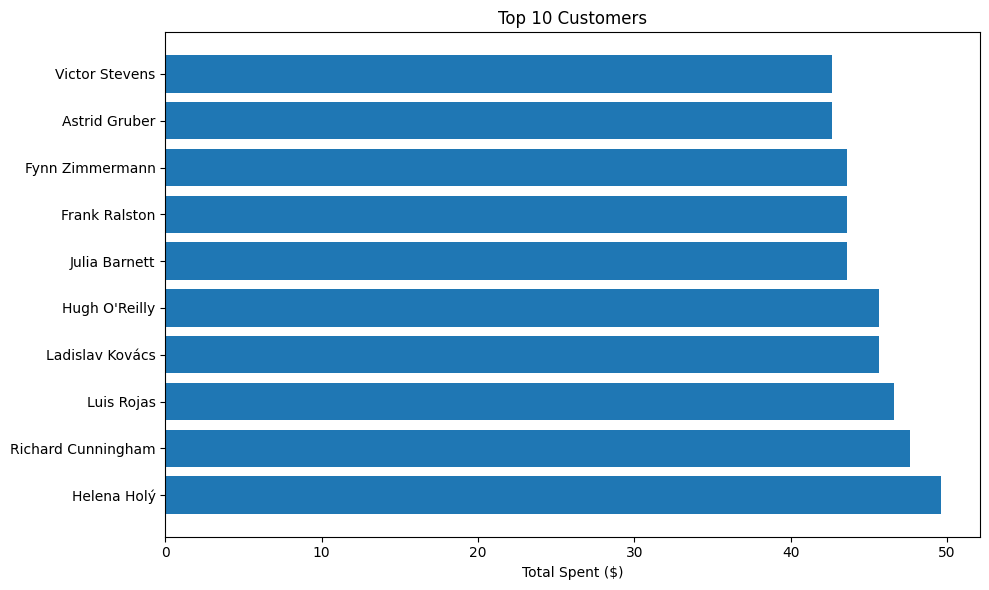


2. What genres are most popular?
Most Popular Genres:
                Genre  TracksSold
0                Rock         835
1               Latin         386
2               Metal         264
3  Alternative & Punk         244
4                Jazz          80
5               Blues          61
6            TV Shows          47
7            R&B/Soul          41


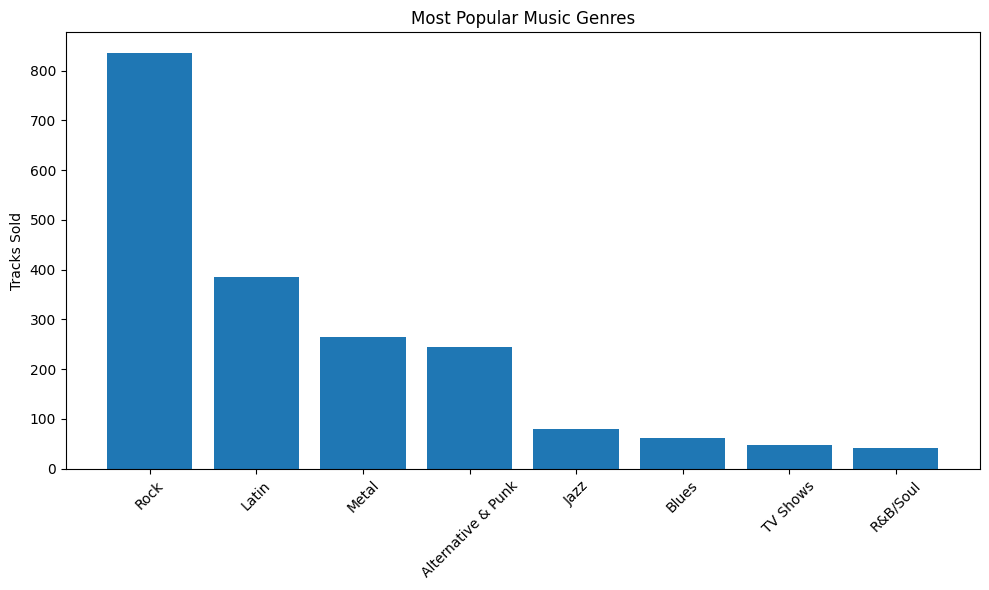


3. How do sales change month to month?
Monthly Sales:
      Month  MonthlyRevenue
0   2009-01           35.64
1   2009-02           37.62
2   2009-03           37.62
3   2009-04           37.62
4   2009-05           37.62
5   2009-06           37.62
6   2009-07           37.62
7   2009-08           37.62
8   2009-09           37.62
9   2009-10           37.62
10  2009-11           37.62
11  2009-12           37.62
12  2010-01           52.62
13  2010-02           46.62
14  2010-03           44.62
15  2010-04           37.62
16  2010-05           37.62
17  2010-06           37.62
18  2010-07           37.62
19  2010-08           37.62
20  2010-09           36.63
21  2010-10           37.62
22  2010-11           37.62
23  2010-12           37.62
24  2011-01           37.62
25  2011-02           37.62
26  2011-03           37.62
27  2011-04           51.62
28  2011-05           42.62
29  2011-06           50.62
30  2011-07           37.62
31  2011-08           37.62
32  2011-09          

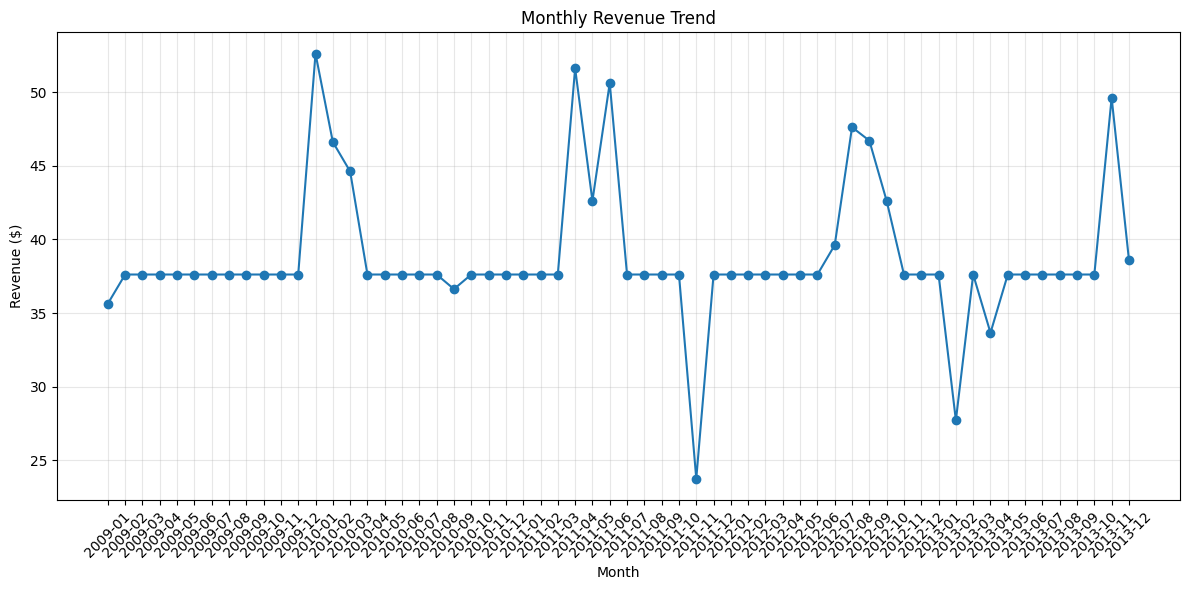


4. How are employees performing?
Employee Performance:
       EmployeeName                Title  InvoicesHandled  TotalSales
0      Jane Peacock  Sales Support Agent              146      833.04
1     Margaret Park  Sales Support Agent              140      775.40
2     Steve Johnson  Sales Support Agent              126      720.16
3      Andrew Adams      General Manager                0         NaN
4     Nancy Edwards        Sales Manager                0         NaN
5  Michael Mitchell           IT Manager                0         NaN
6       Robert King             IT Staff                0         NaN
7    Laura Callahan             IT Staff                0         NaN

5. Where do our customers come from?
Top Countries by Revenue:
          Country  CustomerCount  TotalRevenue
0             USA             91        523.06
1          Canada             56        303.96
2          France             35        195.10
3          Brazil             35        190.10
4         Germa

In [3]:
# SQL Music Store Analysis
# Simple project to practice SQL skills

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

print("Setting up for SQL analysis...")

# Download a sample database
print("Downloading music store database...")
!wget -q https://www.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip
!unzip -q chinook.zip

# Connect to the database
conn = sqlite3.connect('chinook.db')
print("Connected to database!")

# Let's see what tables we have (check exact names)
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(query, conn)
print("\nTables in the database:")
print(tables)

# Let's check what columns are in the customers table
print("\nChecking customers table columns...")
try:
    customer_cols = pd.read_sql_query("PRAGMA table_info(customers);", conn)
    print("Customers table columns:")
    print(customer_cols)
except:
    print("Couldn't get columns info")

print("\n" + "="*50)
print("STARTING ANALYSIS")
print("="*50)

# Analysis 1: Top customers (using lowercase table names)
print("\n1. Who are our best customers?")

query1 = """
SELECT
    c.FirstName || ' ' || c.LastName as CustomerName,
    c.Country,
    SUM(i.Total) as TotalSpent
FROM customers c
JOIN invoices i ON c.CustomerId = i.CustomerId
GROUP BY c.CustomerId
ORDER BY TotalSpent DESC
LIMIT 10;
"""

try:
    top_customers = pd.read_sql_query(query1, conn)
    print("Top 10 Customers:")
    print(top_customers)

    # Make a simple chart
    plt.figure(figsize=(10, 6))
    plt.barh(top_customers['CustomerName'], top_customers['TotalSpent'])
    plt.title('Top 10 Customers')
    plt.xlabel('Total Spent ($)')
    plt.tight_layout()
    plt.savefig('top_customers.png')
    plt.show()
except Exception as e:
    print(f"Error: {e}")

# Analysis 2: What music sells best?
print("\n2. What genres are most popular?")

query2 = """
SELECT
    g.Name as Genre,
    COUNT(*) as TracksSold
FROM genres g
JOIN tracks t ON g.GenreId = t.GenreId
JOIN invoice_items il ON t.TrackId = il.TrackId
GROUP BY g.Name
ORDER BY TracksSold DESC
LIMIT 8;
"""

try:
    top_genres = pd.read_sql_query(query2, conn)
    print("Most Popular Genres:")
    print(top_genres)

    plt.figure(figsize=(10, 6))
    plt.bar(top_genres['Genre'], top_genres['TracksSold'])
    plt.title('Most Popular Music Genres')
    plt.ylabel('Tracks Sold')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('top_genres.png')
    plt.show()
except Exception as e:
    print(f"Error: {e}")

# Analysis 3: Sales over time
print("\n3. How do sales change month to month?")

query3 = """
SELECT
    strftime('%Y-%m', InvoiceDate) as Month,
    SUM(Total) as MonthlyRevenue
FROM invoices
GROUP BY strftime('%Y-%m', InvoiceDate)
ORDER BY Month;
"""

try:
    monthly_sales = pd.read_sql_query(query3, conn)
    print("Monthly Sales:")
    print(monthly_sales)

    plt.figure(figsize=(12, 6))
    plt.plot(monthly_sales['Month'], monthly_sales['MonthlyRevenue'], marker='o')
    plt.title('Monthly Revenue Trend')
    plt.xlabel('Month')
    plt.ylabel('Revenue ($)')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('monthly_revenue.png')
    plt.show()
except Exception as e:
    print(f"Error: {e}")

# Analysis 4: Employee performance
print("\n4. How are employees performing?")

query4 = """
SELECT
    e.FirstName || ' ' || e.LastName as EmployeeName,
    e.Title,
    COUNT(i.InvoiceId) as InvoicesHandled,
    SUM(i.Total) as TotalSales
FROM employees e
LEFT JOIN customers c ON e.EmployeeId = c.SupportRepId
LEFT JOIN invoices i ON c.CustomerId = i.CustomerId
GROUP BY e.EmployeeId
ORDER BY TotalSales DESC;
"""

try:
    employee_sales = pd.read_sql_query(query4, conn)
    print("Employee Performance:")
    print(employee_sales)
except Exception as e:
    print(f"Error: {e}")

# Analysis 5: Where are customers from?
print("\n5. Where do our customers come from?")

query5 = """
SELECT
    c.Country,
    COUNT(*) as CustomerCount,
    SUM(i.Total) as TotalRevenue
FROM customers c
JOIN invoices i ON c.CustomerId = i.CustomerId
GROUP BY c.Country
ORDER BY TotalRevenue DESC
LIMIT 10;
"""

try:
    countries = pd.read_sql_query(query5, conn)
    print("Top Countries by Revenue:")
    print(countries)
except Exception as e:
    print(f"Error: {e}")

# Close the connection
conn.close()

print("\n" + "="*50)
print("ANALYSIS COMPLETE")
print("="*50)

print("\nSummary:")
print("- Used SQL to analyze a real music store database")
print("- Practiced JOINs, GROUP BY, and aggregate functions")
print("- Created charts to visualize the results")
print("- Learned to work with database table structures")

print("\nFiles saved (check left sidebar for downloads):")
print("- top_customers.png")
print("- top_genres.png")
print("- monthly_revenue.png")